# Reading the clean data obtained after removing anomalies

In [1]:
#import relevant libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train_data = pd.read_csv("/content/cleaned_trained_data.csv")

# Exploratory Data Analysis

Study each attribute and its characteristics:

*   Name
*   Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
*   % of missing values
*   Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
*   Possibly useful for the task?
*   Type of distribution (Gaussian, uniform, logarithmic, etc)

In [2]:
train_data.drop(columns=['Auto Loan', 'Credit-Builder Loan', 'Personal Loan',
       'Home Equity Loan', 'Not Specified', 'No Loan', 'Mortgage Loan',
       'Student Loan', 'Debt Consolidation Loan', 'Payday Loan'], inplace=True)

Quick look into the columns

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  int64  
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

Checking for duplicates

In [4]:
train_data.duplicated().sum()

0

Quick look into few rows

In [5]:
train_data.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
58771,0x16e5d,CUS_0x6abf,April,David Ingramq,33,474-00-9682,Accountant,14021,1077.457917,7,5,16,2,"Debt Consolidation Loan, Payday Loan",30,17.0,11.0,6.0,Standard,263,38.037868,13.0,Yes,13.546538,89.0,Low_spent_Small_value_payments,294.0,Standard
23999,0xa29d,CUS_0x591b,August,Jeff Masonb,49,061-35-8180,Manager,12593,3093.745000,3,5,5,1,Payday Loan,9,11.0,11.0,2.0,Standard,1211,27.871107,21.0,Yes,6.786378,52.0,High_spent_Small_value_payments,309.0,Standard
27889,0xb96b,CUS_0x5540,February,ing Langic,31,371-69-7764,Lawyer,17486,1389.212500,9,5,34,2,"Personal Loan, Student Loan",48,22.0,2.0,8.0,Bad,2376,27.460459,6.0,Yes,24.144543,80.0,Low_spent_Small_value_payments,323.0,Poor
65598,0x1965c,CUS_0xa6a,July,Blenkinsopu,44,657-94-9439,Lawyer,49657,4193.160000,8,5,27,5,"Home Equity Loan, Credit-Builder Loan, Persona...",30,17.0,9.0,12.0,Bad,3469,35.980125,2.0,Yes,187.025131,50.0,High_spent_Medium_value_payments,431.0,Poor
86406,0x21048,CUS_0x3b21,July,Alex rah,35,#F%$D@*&8,Entrepreneur,8312,3093.745000,8,5,18,2,"Not Specified, Not Specified",6,11.0,23.0,10.0,Standard,1945,33.265287,6.0,Yes,10.734358,29.0,Low_spent_Small_value_payments,307.0,Standard


Changing the types of columns

In [6]:
num_cols = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card","Interest_Rate","Num_of_Loan", "Delay_from_due_date","Num_of_Delayed_Payment","Changed_Credit_Limit", "Num_Credit_Inquiries","Outstanding_Debt","Credit_Utilization_Ratio","Total_EMI_per_month","Amount_invested_monthly",	"Monthly_Balance","Credit_History_Age"]
cat_cols = ["Occupation","Credit_Mix", "Spending_Level","Payment_Value","Payment_of_Min_Amount"]
target_col = ["Credit_Score"]

In [7]:
class DataCleaner:
    def __init__(self, dataframe, numeric_columns):
        self.dataframe = dataframe
        self.numeric_columns = numeric_columns

    def clean_numeric_columns(self):

        for col in self.numeric_columns:

            if self.dataframe[col].dtype == 'object':
                self.dataframe[col] = self.dataframe[col].str.extract(r'(\d+)')
                self.dataframe[col] = pd.to_numeric(self.dataframe[col], errors='coerce')
                self.dataframe[col] = self.dataframe[col].fillna(self.dataframe[col].median())

            else:
                self.dataframe[col] = self.dataframe[col].fillna(self.dataframe[col].median())

        return self.dataframe



cleaner = DataCleaner(train_data, num_cols)
df = cleaner.clean_numeric_columns()

% of missing values

In [8]:
df.isnull().sum()/float(len(df))*100

,0
ID,0.0
Customer_ID,0.0
Month,0.0
Name,0.0
Age,0.0
SSN,0.0
Occupation,0.0
Annual_Income,0.0
Monthly_Inhand_Salary,0.0
Num_Bank_Accounts,0.0


Descreptive analysis for all columns

In [9]:
train_data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.515710,52024.91634,3984.951951,5.410950,5.57628,14.595490,3.53405,21.068780,13.39690,9.945490,5.807080,1425.722400,32.285173,17.969540,98.419696,614.454560,399.787930
std,11.222993,53250.74894,2890.521244,2.782155,2.20729,8.821211,2.45113,14.860104,6.05782,6.605945,4.010791,1155.131822,5.116875,7.935336,106.853303,1999.832038,210.842478
min,14.000000,7005.00000,303.645417,-1.000000,0.00000,1.000000,0.00000,-5.000000,0.00000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,19368.25000,1792.084167,3.000000,4.00000,7.000000,2.00000,10.000000,9.00000,5.000000,3.000000,566.000000,28.052567,12.000000,28.482551,77.000000,271.000000
50%,33.000000,37085.00000,3093.745000,6.000000,5.00000,13.000000,3.00000,18.000000,14.00000,9.000000,6.000000,1166.000000,32.305784,18.000000,64.680312,135.000000,336.000000
75%,42.000000,71826.25000,5318.267500,7.000000,7.00000,20.000000,5.00000,28.000000,18.00000,14.000000,8.000000,1945.250000,36.496663,24.000000,139.122937,255.000000,463.000000
max,85.000000,1000000.00000,15204.633333,30.000000,20.00000,40.000000,29.00000,67.000000,30.00000,36.000000,93.000000,4998.000000,50.000000,33.000000,10356.000000,10000.000000,1602.000000


## Categorical features

In [10]:
# Explore categorical features
for col in train_data.select_dtypes(include=['object']):
    print(f"\nColumn: {col}")
    print(train_data[col].value_counts().head())


Column: ID
ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
Name: count, dtype: int64

Column: Customer_ID
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
Name: count, dtype: int64

Column: Month
Month
January     12500
February    12500
March       12500
April       12500
May         12500
Name: count, dtype: int64

Column: Name
Name
Langep               48
Jessicad             48
Stevex               48
Huwk                 40
Jonathan Stempelr    40
Name: count, dtype: int64

Column: SSN
SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
Name: count, dtype: int64

Column: Occupation
Occupation
Lawyer       7096
Engineer     6864
Architect    6824
Mechanic     6776
Scientist    6744
Name: count, dtype: int64

Column: Type_of_Loan
Type_of_Loan
No Loan                    11408
Not Specified               1408
Credit-Builder Loan         1280
Personal Loan               1

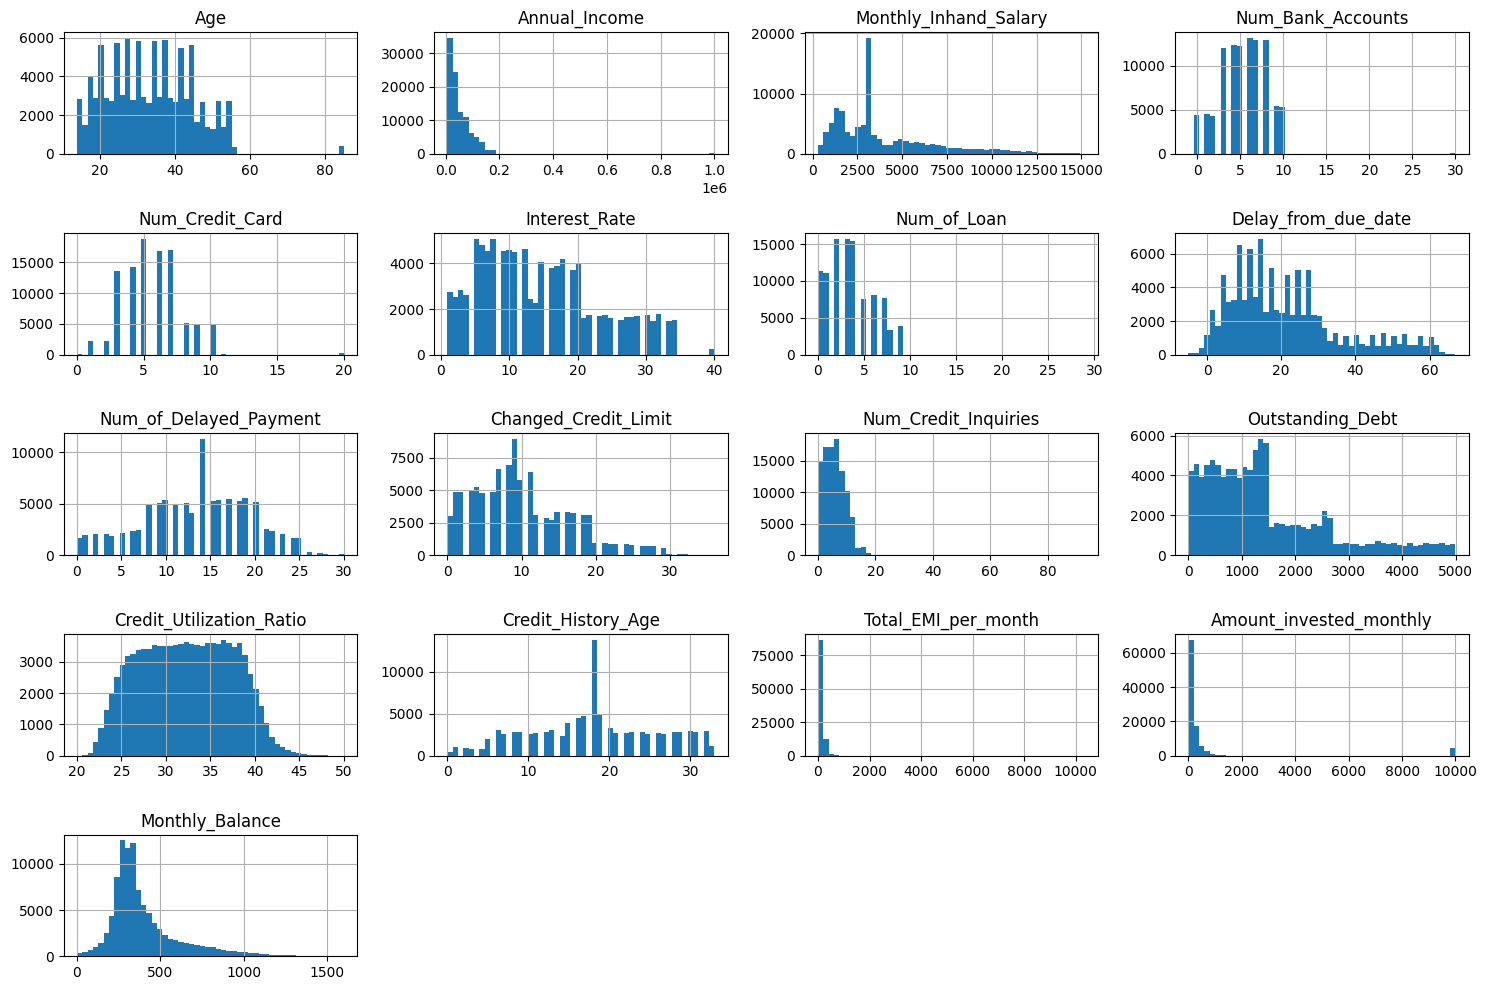

In [11]:
all_numeric = df.select_dtypes(include=[np.number]).columns

# Filter out columns that are effectively binary or near-binary(e.g., those with <= 2 unique values)
numeric_cols = [col for col in all_numeric if df[col].nunique() > 2]

# plot histograms for truly numeric columns
df[numeric_cols].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

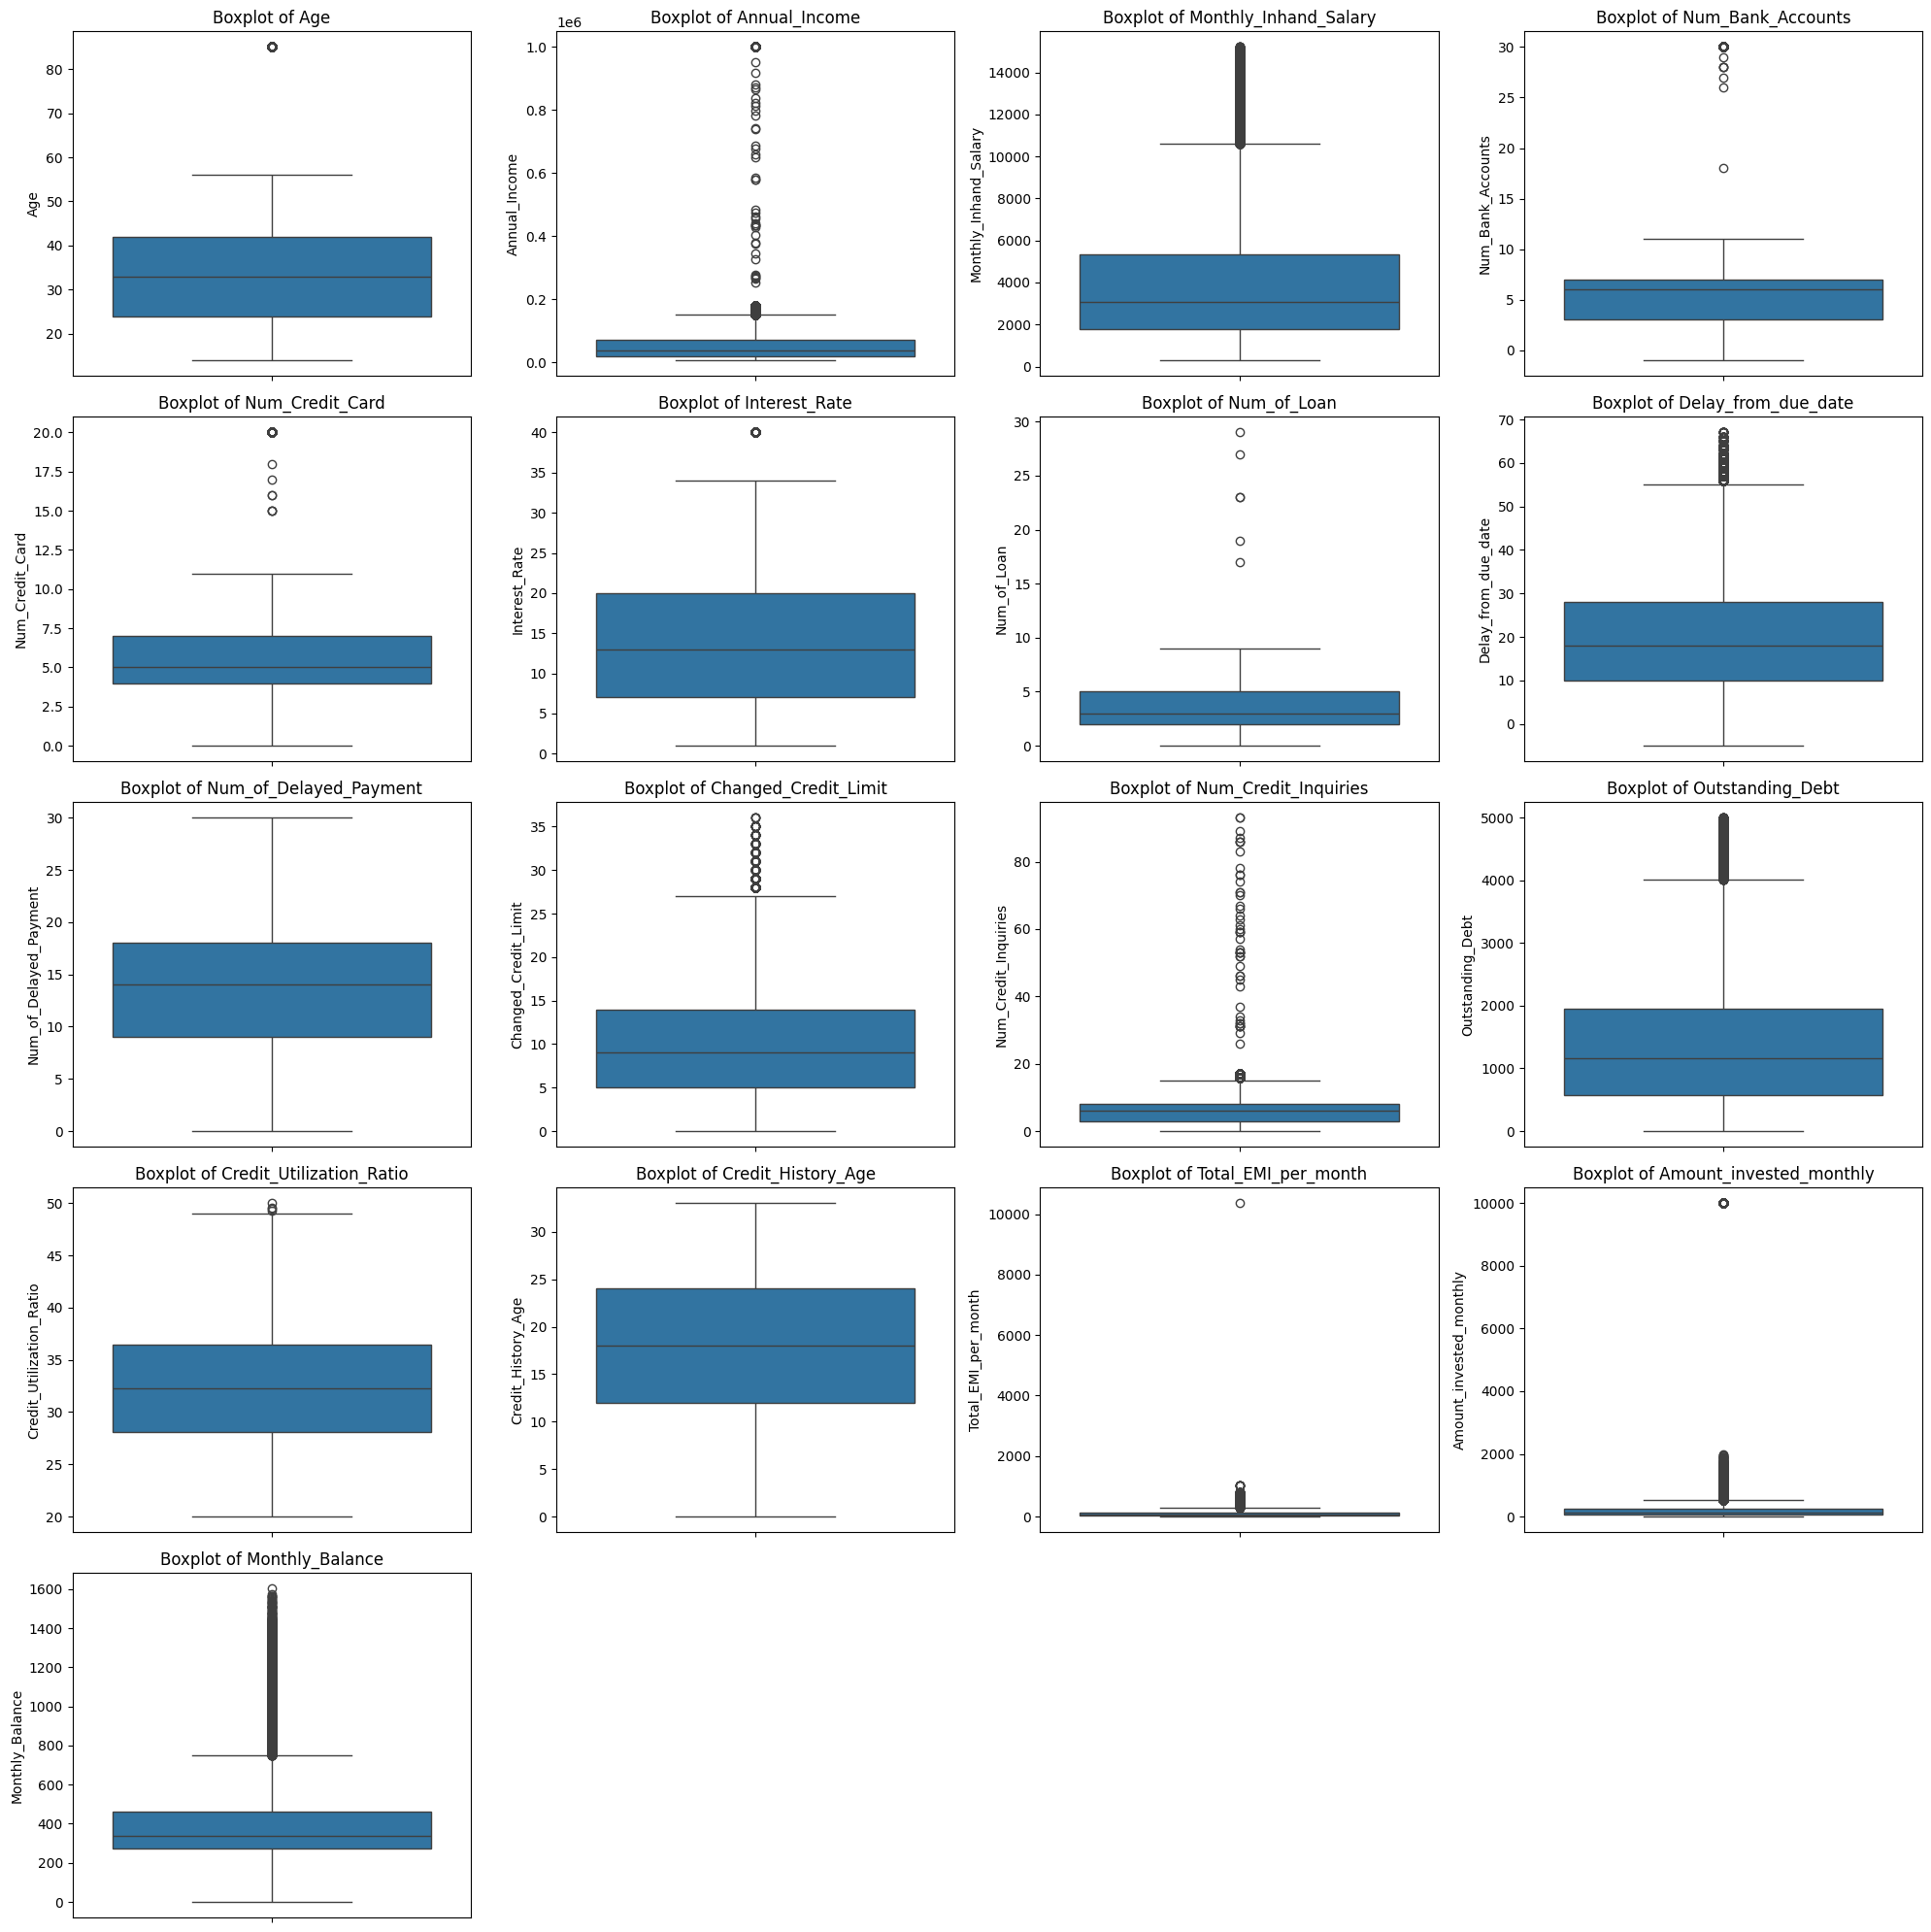

In [13]:
import math

# grid layout for boxplots
n = len(numeric_cols)
rows = int(math.ceil(math.sqrt(n)))
cols = int(math.ceil(n / rows))


fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))


axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

#dealing with unused
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Inspecting Age

In [14]:
#lets look at age variable
age_over_100= (df['Age'] > 100).sum()
age_over_100
age_over_100_percent= (age_over_100 / len(df['Age'])) * 100

print(f'# of users listed as over 100: {age_over_100}, {age_over_100_percent:.2f}%')

#Average Life Expectancy in the USA is typically around 78 Years, building buffer, we will cap age at 100 and impute the rest with median
realistic_ages = df['Age'][df['Age'] <= 110] # or 100.
median_age = realistic_ages.median()

# 2. Impute values over 100 with the median
df['Age'] = np.where(df['Age'] > 100, median_age, df['Age'])

print(df['Age'].describe()) #check the results.

# of users listed as over 100: 0, 0.00%
count    100000.000000
mean         33.515710
std          11.222993
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          85.000000
Name: Age, dtype: float64


### Occupation

Occupation Value Counts:
 Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64


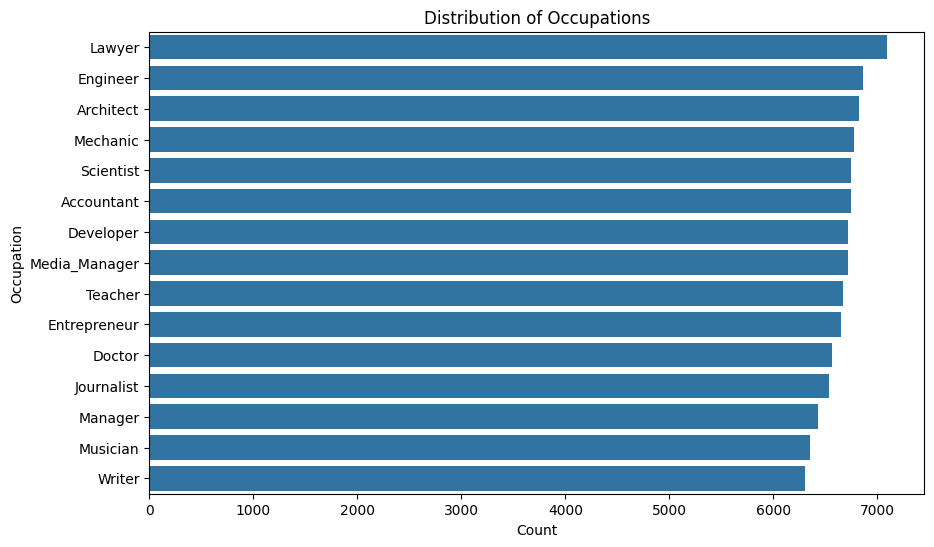

In [15]:
import seaborn as sns
occupation_counts = df['Occupation'].value_counts()
print("Occupation Value Counts:\n", occupation_counts)

# 2. Bar Plot (Visual Distribution)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(y='Occupation', data=df, order=df['Occupation'].value_counts().index) #order by most frequent.
plt.title('Distribution of Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()


### Annual Income
- check for outliers given earlier data descriptions + histogram insights

In [27]:
income_mean = df["Annual_Income"].mean()
income_std = df["Annual_Income"].std()

# Compute Z-scores
df["income_zscore"] = (df["Annual_Income"] - income_mean) / income_std

# Choose a threshold, e.g., |z| > 3 for "extreme" outliers
outliers_z = df[np.abs(df["income_zscore"]) > 3]
print("Number of outliers by Z-score:", len(outliers_z))


# we expect outliers in income related data -- check if this makes sense with real world knowlede
threshold = 150000
num_above_threshold = df[df["Annual_Income"] > threshold].shape[0]
pct_above_threshold = num_above_threshold / len(df) * 100

print(f"Number of people above ${threshold}: {num_above_threshold}")
print(f"Percentage of dataset: {pct_above_threshold:.2f}%")
#As often shared -- top 2% have extraordirarily high incomes

Number of outliers by Z-score: 178
Number of people above $150000: 2191
Percentage of dataset: 2.19%


In [28]:
quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]

total_count = len(df)

print("High-end percentile analysis for Annual_Income:")
for q in quantiles:
    cutoff_value = df["Annual_Income"].quantile(q)
    # Count how many rows exceed this cutoff
    above_cutoff = (df["Annual_Income"] > cutoff_value).sum()
    pct_above = (above_cutoff / total_count) * 100

    print(f"Percentile: {q*100:.1f}%")
    print(f"  - Cutoff Value: {cutoff_value:,.2f}")
    print(f"  - # of People Above: {above_cutoff} ({pct_above:.2f}% of dataset)")
    print("-" * 50)


High-end percentile analysis for Annual_Income:
Percentile: 90.0%
  - Cutoff Value: 109,608.40
  - # of People Above: 10000 (10.00% of dataset)
--------------------------------------------------
Percentile: 95.0%
  - Cutoff Value: 131,199.00
  - # of People Above: 4994 (4.99% of dataset)
--------------------------------------------------
Percentile: 99.0%
  - Cutoff Value: 169,293.00
  - # of People Above: 993 (0.99% of dataset)
--------------------------------------------------
Percentile: 99.5%
  - Cutoff Value: 175,796.00
  - # of People Above: 498 (0.50% of dataset)
--------------------------------------------------
Percentile: 99.9%
  - Cutoff Value: 1,000,000.00
  - # of People Above: 0 (0.00% of dataset)
--------------------------------------------------


### Month in Hand Salary

In [29]:
# Calculate mean and standard deviation for Monthly_Inhand_Salary
income_mean = df['Monthly_Inhand_Salary'].mean()
income_std = df['Monthly_Inhand_Salary'].std()

# Compute Z-scores for Monthly_Inhand_Salary
df['income_zscore'] = (df['Monthly_Inhand_Salary'] - income_mean) / income_std

# Identify outliers using Z-score threshold
outliers_z = df[np.abs(df['income_zscore']) > 3]
print("Number of outliers by Z-score:", len(outliers_z))


for q in quantiles:
    cutoff_value = df["Monthly_Inhand_Salary"].quantile(q)
    # Count how many rows exceed this cutoff
    above_cutoff = (df["Monthly_Inhand_Salary"] > cutoff_value).sum()
    pct_above = (above_cutoff / total_count) * 100

    print(f"Percentile: {q*100:.1f}%")
    print(f"  - Cutoff Value: {cutoff_value:,.2f}")
    print(f"  - # of People Above: {above_cutoff} ({pct_above:.2f}% of dataset)")
    print("-" * 50)


Number of outliers by Z-score: 1174
Percentile: 90.0%
  - Cutoff Value: 8,447.83
  - # of People Above: 10000 (10.00% of dataset)
--------------------------------------------------
Percentile: 95.0%
  - Cutoff Value: 10,299.42
  - # of People Above: 4999 (5.00% of dataset)
--------------------------------------------------
Percentile: 99.0%
  - Cutoff Value: 12,962.26
  - # of People Above: 994 (0.99% of dataset)
--------------------------------------------------
Percentile: 99.5%
  - Cutoff Value: 13,871.03
  - # of People Above: 497 (0.50% of dataset)
--------------------------------------------------
Percentile: 99.9%
  - Cutoff Value: 14,784.82
  - # of People Above: 95 (0.10% of dataset)
--------------------------------------------------


In [31]:
df['Monthly_Inhand_Salary'].describe()

,Monthly_Inhand_Salary
count,100000.000000
mean,3971.143866
std,2870.931470
min,303.645417
25%,1792.084167
50%,3093.745000
75%,5293.190000
max,15204.633333


- Log-transform Monthly Salary to make it normal

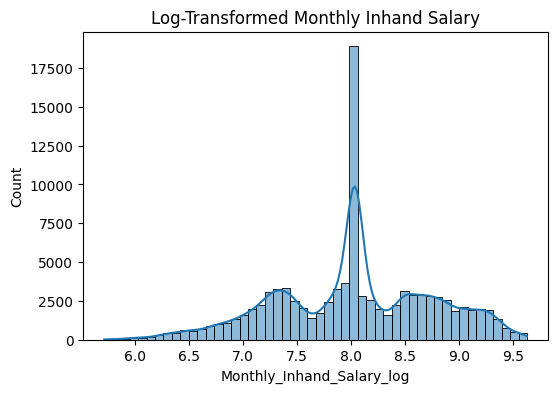

In [32]:
#once again we will log tansform
# Log transform Monthly_Inhand_Salary
df['Monthly_Inhand_Salary_log'] = np.log1p(df['Monthly_Inhand_Salary'])

# Visualize log-transformed Monthly_Inhand_Salary
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Monthly_Inhand_Salary_log', bins=50, kde=True)
plt.title("Log-Transformed Monthly Inhand Salary")
plt.show()

### Num_Bank_Accounts

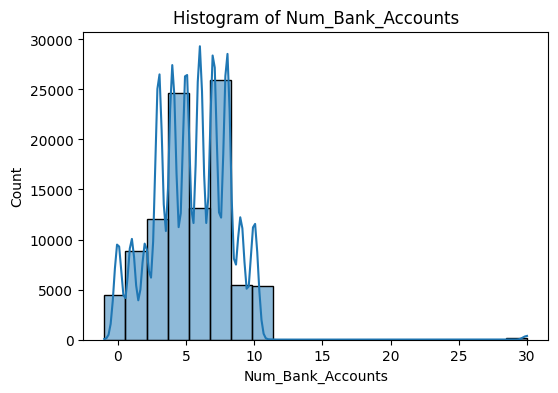

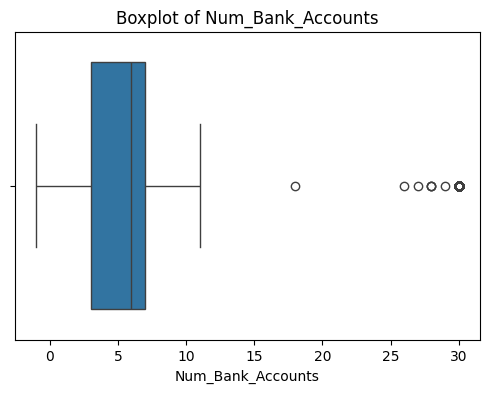

In [33]:
#review bank account details again
df['Num_Bank_Accounts'].describe()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Num_Bank_Accounts", bins=20, kde=True)
plt.title("Histogram of Num_Bank_Accounts")
plt.show()

# 4. Boxplot (to see outliers/variance)
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Num_Bank_Accounts"])
plt.title("Boxplot of Num_Bank_Accounts")
plt.show()



In [34]:
# Calculate the size of the DataFrame for reference
total_count = len(df)

print("Num_Bank_Accounts high-end percentile analysis:")
for q in quantiles:
    threshold = df["Num_Bank_Accounts"].quantile(q)
    # Number of rows at or below the threshold
    num_at_or_below = (df["Num_Bank_Accounts"] <= threshold).sum()
    # Number of rows strictly above the threshold
    num_above = total_count - num_at_or_below

    print(f"{q*100:.1f}th percentile = {threshold:.2f}, # people above this % = {num_above}")



Num_Bank_Accounts high-end percentile analysis:
90.0th percentile = 9.00, # people above this % = 5501
95.0th percentile = 10.00, # people above this % = 180
99.0th percentile = 10.00, # people above this % = 180
99.5th percentile = 10.00, # people above this % = 180
99.9th percentile = 30.00, # people above this % = 0


### Num_Credit_cards

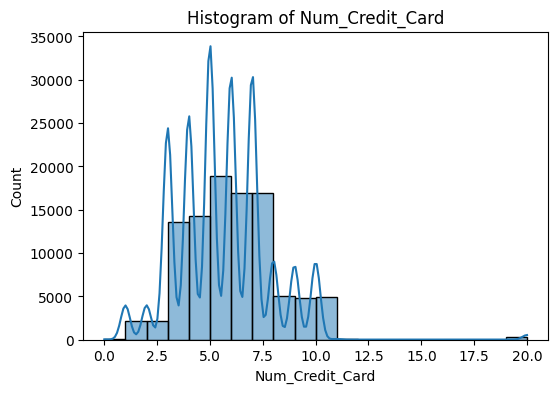

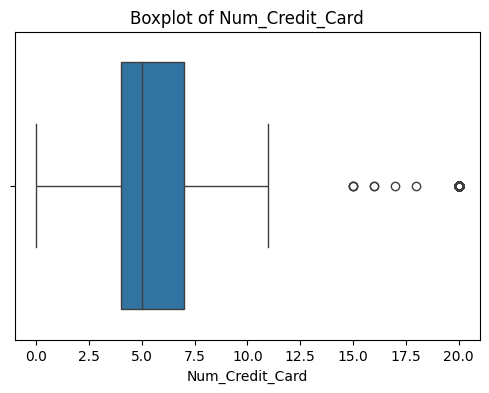

High-end percentiles for Num_Credit_Card:
90th percentile: 9.0
95th percentile: 10.0
99th percentile: 10.0
99th percentile: 10.0
99th percentile: 20.0


In [35]:
#review bank account details again - #max 1499, min 0
df['Num_Credit_Card'].describe()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Num_Credit_Card", bins=20, kde=True)
plt.title("Histogram of Num_Credit_Card")
plt.show()

# 4. Boxplot (to see outliers/variance)
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Num_Credit_Card"])
plt.title("Boxplot of Num_Credit_Card")
plt.show()


q_values = df["Num_Credit_Card"].quantile(quantiles)

print("High-end percentiles for Num_Credit_Card:")
for q in quantiles:
    print(f"{int(q*100)}th percentile: {df['Num_Credit_Card'].quantile(q)}")


# One-hot encoding for Categorical columns

Let's extract types of loan and one-hot encode it into our dataset

In [17]:
import pandas as pd

# Define stop words to remove
stop_words = {'and'}

# Function to clean Type_of_Loan while preserving full phrases
def clean_loan_types(loan_text):
    if pd.isna(loan_text):
        return loan_text  # Keep NaN values unchanged

    # Remove "and" and extra spaces while keeping multi-word phrases
    cleaned_loans = " ".join(word for word in loan_text.split() if word.lower() not in stop_words)

    return cleaned_loans.strip()

# Apply the function to clean the Type_of_Loan column
df['Type_of_Loan'] = df['Type_of_Loan'].apply(clean_loan_types)

df['Type_of_Loan'].head()

,Type_of_Loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."


In [18]:
#Show uniaue values of Type_of_Loan
df['Type_of_Loan'].value_counts(ascending=False).head()

,count
Type_of_Loan,
No Loan,11408
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264


In [19]:
# Flatten all loan types into a single list and get unique loan types
unique_loan_types = pd.unique(df['Type_of_Loan'].dropna().str.split(', ').sum())

<ipython-input-19-156f5e395acf>:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_loan_types = pd.unique(df['Type_of_Loan'].dropna().str.split(', ').sum())


In [20]:
# Create a new column for each unique loan type with binary indicators
for loan_type in unique_loan_types:
    df[loan_type] = df['Type_of_Loan'].apply(lambda x: 1 if pd.notnull(x) and loan_type in x else 0)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Not Specified,No Loan,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.0,4.0,Good,809,26.822620,22.0,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good,1,1,1,1,0,0,0,0,0,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,14.0,11.0,4.0,Good,809,31.944960,18.0,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good,1,1,1,1,0,0,0,0,0,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,9.0,4.0,Good,809,28.609352,22.0,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good,1,1,1,1,0,0,0,0,0,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.0,4.0,Good,809,31.377862,22.0,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good,1,1,1,1,0,0,0,0,0,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,14.0,11.0,4.0,Good,809,24.797347,22.0,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good,1,1,1,1,0,0,0,0,0,0


### Months

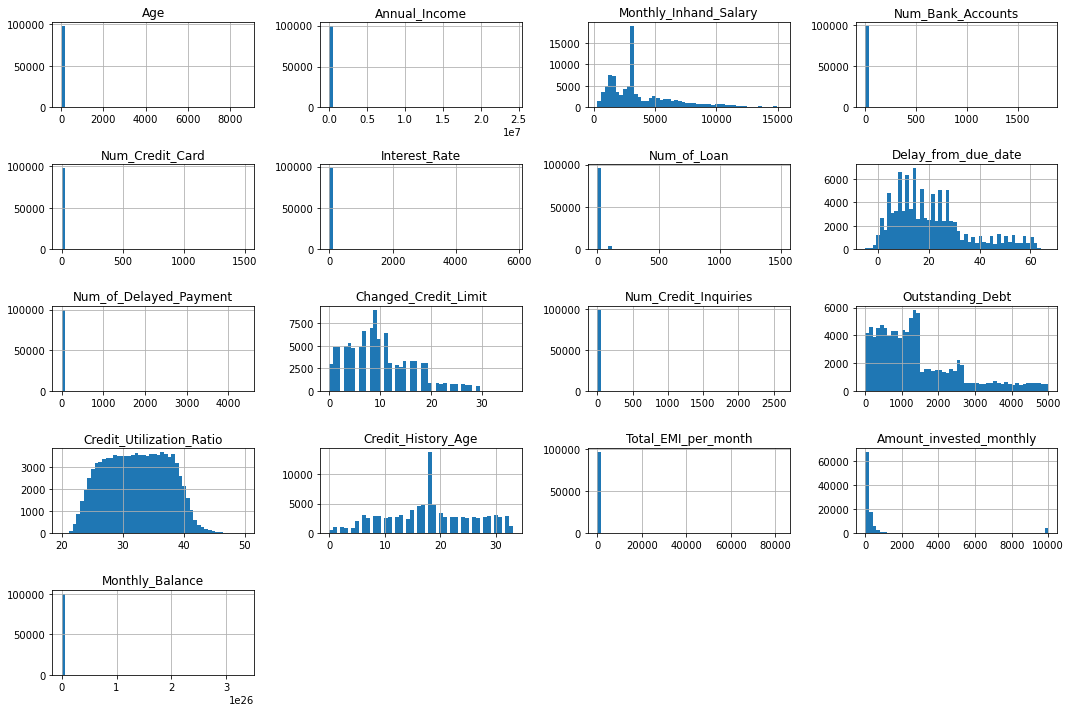

In [ ]:
# Map months
month_map = {
    'January': 1, 'Jan': 1,
    'February': 2, 'Feb': 2,
    'March': 3, 'Mar': 3,
    'April': 4, 'Apr': 4,
    'May': 5,
    'June': 6, 'Jun': 6,
    'July': 7, 'Jul': 7,
    'August': 8, 'Aug': 8,
    'September': 9, 'Sep': 9,
    'October': 10, 'Oct': 10,
    'November': 11, 'Nov': 11,
    'December': 12, 'Dec': 12
}

df["Month_num"] = df["Month"].map(month_map)

# create cyclical features
df["Month_sin"] = np.sin(2 * np.pi * df["Month_num"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month_num"] / 12)

Overall: Many numeric features show heavy skew and extreme outliers (likely data-entry issues or genuine rare cases). In order to understand this further, we will inspect variables individually and decide on way forward. Some initial nots:
Income & Salary: Highly skewed; a few very large values dominate.
Bank/Credit Counts: Mostly small (under 10), but some extreme spikes (hundreds+).
Interest Rate: Typically under 30–40%, but extreme cases in the thousands.
Loans & Delays: Most users have modest loan counts and delays, but a fraction show huge numbers.
Outstanding Debt & Monthly Balance: Large ranges with extremely high outliers.
Next Steps: Log transforms, capping/winsorizing, and verifying domain plausibility for outliers.

Reviewing Variable: Interest Rate

In [ ]:
print(df['Interest_Rate'].describe())

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64


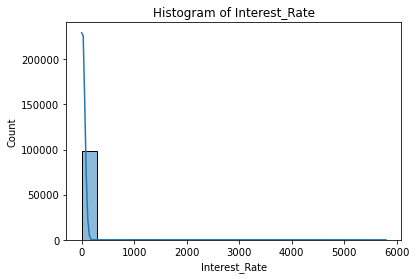

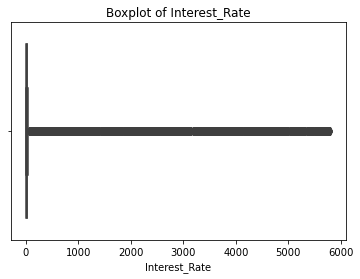

In [ ]:

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Interest_Rate", bins=20, kde=True)
plt.title("Histogram of Interest_Rate")
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Interest_Rate"])
plt.title("Boxplot of Interest_Rate")
plt.show()

In [ ]:

# Quantile analysis
quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]
q_values = df["Interest_Rate"].quantile(quantiles)

print("High-end percentiles for Interest_Rate:")
for q in quantiles:
    print(f"{int(q * 100)}th percentile: {df['Interest_Rate'].quantile(q)}")

High-end percentiles for Interest_Rate:
90th percentile: 29.0
95th percentile: 33.0
99th percentile: 2865.0099999999948
99th percentile: 4311.010000000009
99th percentile: 5547.001000000004


Inspecting Variable: Delay_from_Due_Date

In [ ]:
print(df['Delay_from_due_date'].describe())


count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64


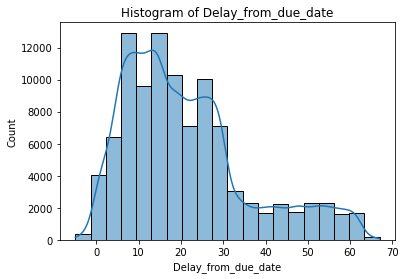

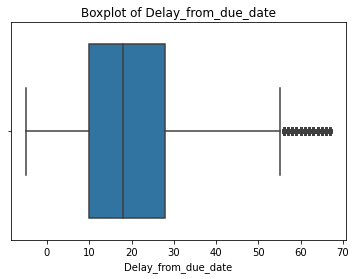

High-end percentiles for Delay_from_due_date:
90th percentile: 45.0
95th percentile: 54.0
99th percentile: 61.0
99th percentile: 62.0
99th percentile: 65.0


In [ ]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Delay_from_due_date", bins=20, kde=True)
plt.title("Histogram of Delay_from_due_date")
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Delay_from_due_date"])
plt.title("Boxplot of Delay_from_due_date")
plt.show()

# Quantile analysis
quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]
q_values = df["Delay_from_due_date"].quantile(quantiles)

print("High-end percentiles for Delay_from_due_date:")
for q in quantiles:
    print(f"{int(q * 100)}th percentile: {df['Delay_from_due_date'].quantile(q)}")

In [ ]:
mean_delay = df["Delay_from_due_date"].mean()
std_delay = df["Delay_from_due_date"].std()

# Z-score for each value
df["Delay_Zscore"] = (df["Delay_from_due_date"] - mean_delay) / std_delay

# Outliers: abs(Z-score) > 3
outliers_z = df[df["Delay_Zscore"].abs() > 3]
print("\nZ-Score Method:")
print(f"Mean = {mean_delay}, Std Dev = {std_delay}")
print(f"Number of outliers (|Z| > 3) = {len(outliers_z)}")



Z-Score Method:
Mean = 21.06878, Std Dev = 14.860104223677403
Number of outliers (|Z| > 3) = 54


Inspecting Variable: Num of Delayed Payments

In [ ]:
print(df['Num_of_Delayed_Payment'].describe())

count    100000.000000
mean         29.759690
std         218.014703
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64


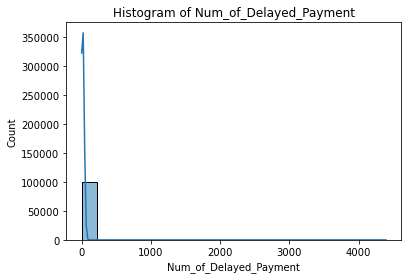

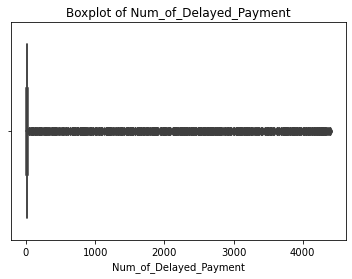

In [ ]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Num_of_Delayed_Payment", bins=20, kde=True)
plt.title("Histogram of Num_of_Delayed_Payment")
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Num_of_Delayed_Payment"])
plt.title("Boxplot of Num_of_Delayed_Payment")
plt.show()

In [ ]:


# Quantile analysis
quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]
q_values = df["Num_of_Delayed_Payment"].quantile(quantiles)

print("High-end percentiles for Num_of_Delayed_Payment:")
for q in quantiles:
    print(f"{int(q * 100)}th percentile: {df['Num_of_Delayed_Payment'].quantile(q)}")

High-end percentiles for Num_of_Delayed_Payment:
90th percentile: 21.0
95th percentile: 23.0
99th percentile: 27.0
99th percentile: 1511.0600000000559
99th percentile: 3815.0040000000154


In [ ]:
df = handle_outliers_with_last_valid(
    df=df,
    col_name="Num_of_Delayed_Payment",
    cutoff=30,        # Cap all values above 30 to 30 given it cover 99%
    id_col="Customer_ID"
)

Rows over 30 for Num_of_Delayed_Payment before fix: 736
Rows still over 30 for Num_of_Delayed_Payment after last-valid replacement: 90
count    100000.00000
mean         13.39690
std           6.05782
min           0.00000
25%           9.00000
50%          14.00000
75%          18.00000
max          30.00000
Name: Num_of_Delayed_Payment, dtype: float64


In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Month_num,Month_sin,Month_cos,Occ_Architect,Occ_Developer,Occ_Doctor,Occ_Engineer,Occ_Entrepreneur,Occ_Journalist,Occ_Lawyer,Occ_Manager,Occ_Mechanic,Occ_Media_Manager,Occ_Musician,Occ_Scientist,Occ_Teacher,Occ_Unknown,Occ_Writer,income_zscore,Annual_Income_log,Monthly_Inhand_Salary_log,Delay_Zscore
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.0,4.0,_,809,26.822620,22.0,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good,1,0.500000,8.660254e-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.744333,9.858229,7.509797,-1.215926
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,14.0,11.0,4.0,Good,809,31.944960,18.0,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good,2,0.866025,5.000000e-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.315848,9.858229,8.037461,-1.485103
2,0x1604,CUS_0xd40,March,Aaron Maashoh,33.0,821-00-0265,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,9.0,4.0,Good,809,28.609352,22.0,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good,3,1.000000,6.123234e-17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.315848,9.858229,8.037461,-1.215926
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.0,4.0,Good,809,31.377862,22.0,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good,4,0.866025,-5.000000e-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.315848,9.858229,8.037461,-1.081337
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,14.0,11.0,4.0,Good,809,24.797347,22.0,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good,5,0.500000,-8.660254e-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.744333,9.858229,7.509797,-1.014043


In [ ]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_num,Month_sin,Month_cos,Occ_Architect,Occ_Developer,Occ_Doctor,Occ_Engineer,Occ_Entrepreneur,Occ_Journalist,Occ_Lawyer,Occ_Manager,Occ_Mechanic,Occ_Media_Manager,Occ_Musician,Occ_Scientist,Occ_Teacher,Occ_Unknown,Occ_Writer,income_zscore,Annual_Income_log,Monthly_Inhand_Salary_log,Delay_Zscore
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05
mean,33.314300,1.764152e+05,4029.084964,5.691490,5.861580,15.049630,3.534230,21.068780,13.506540,9.945490,27.326780,1425.722400,32.285173,17.969540,1403.118217,614.454560,3.000000e+22,4.500000,0.295753,-0.295753,0.063550,0.062350,0.060870,0.063500,0.061740,0.060850,0.065750,0.059730,0.062910,0.062320,0.059110,0.062990,0.062150,0.07062,0.058850,-1.459080e-13,10.591799,8.043689,3.816997e-16
std,10.628376,1.429618e+06,2961.363540,3.807897,2.969267,9.367745,2.451532,14.860104,6.183489,6.605945,191.293766,1155.131822,5.116875,7.935336,8306.041270,1999.832038,3.162151e+24,2.291299,0.642288,0.642288,0.243951,0.241791,0.239093,0.243861,0.240684,0.239056,0.247846,0.236987,0.242802,0.241737,0.235832,0.242946,0.241429,0.25619,0.235345,1.000000e+00,0.964912,0.737660,1.000000e+00
min,14.000000,7.005000e+03,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,-0.866025,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.258015e+00,8.854522,5.719149,-1.754280e+00
25%,25.000000,1.945700e+04,1792.084167,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.000000,3.000000,566.000000,28.052567,12.000000,30.306660,77.000000,2.710000e+02,2.750000,-0.125000,-0.866025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-7.553955e-01,9.876014,7.491692,-7.448656e-01
50%,33.000000,3.757800e+04,3093.745000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.000000,6.000000,1166.000000,32.305784,18.000000,69.249473,135.000000,3.360000e+02,4.500000,0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-3.158477e-01,10.534201,8.037461,-2.065113e-01
75%,41.000000,7.279000e+04,5371.525000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.000000,9.000000,1945.250000,36.496663,24.000000,161.224249,255.000000,4.630000e+02,6.250000,0.866025,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.533182e-01,11.195348,8.589053,4.664315e-01
max,100.000000,2.419806e+07,15204.633333,30.000000,20.000000,40.000000,29.000000,67.000000,30.000000,36.000000,2597.000000,4998.000000,50.000000,33.000000,82331.000000,10000.000000,3.333333e+26,8.000000,1.000000,0.866025,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,3.773785e+00,17.001783,9.629421,3.090908e+00


- Fixing anomalies in Num_Credit_Inquiries

In [ ]:
df[df['Num_Credit_Inquiries'] >50].head()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Month_num,Month_sin,Month_cos,Occ_Architect,Occ_Developer,Occ_Doctor,Occ_Engineer,Occ_Entrepreneur,Occ_Journalist,Occ_Lawyer,Occ_Manager,Occ_Mechanic,Occ_Media_Manager,Occ_Musician,Occ_Scientist,Occ_Teacher,Occ_Unknown,Occ_Writer,income_zscore,Annual_Income_log,Monthly_Inhand_Salary_log,Delay_Zscore
173,0x1703,CUS_0xa16e,June,Lee Chyenz,42.0,905-50-7912,10183,1074.584583,7,5,17,5,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,24.0,10.0,1050.0,Bad,1672,25.105403,10.0,Yes,37.588073,73.0,Low_spent_Small_value_payments,285.0,Poor,6,1.224647e-16,-1.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.997682,9.228573,6.980620,1.812317
193,0x1723,CUS_0xa5f9,February,Rickt,34.0,189-09-5267,57983,3093.745000,9,8,31,8,"Payday Loan, Not Specified, Credit-Builder Loa...",53,21.0,7.0,1044.0,Bad,3532,37.873642,12.0,Yes,200.432613,193.0,High_spent_Medium_value_payments,327.0,Standard,2,8.660254e-01,5.000000e-01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.315848,10.967922,8.037461,2.148788
198,0x1728,CUS_0xa5f9,July,Rickt,34.0,189-09-5267,57983,4720.926667,9,8,31,8,"Payday Loan, Not Specified, Credit-Builder Loa...",49,21.0,7.0,1936.0,Bad,3532,24.631497,12.0,Yes,200.432613,234.0,Low_spent_Medium_value_payments,316.0,Standard,7,-5.000000e-01,-8.660254e-01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.233623,10.967922,8.459972,1.879611
234,0x1760,CUS_0xb681,March,Sarahb,37.0,904-88-7361,39641,3007.461667,10,8,25,6,"Auto Loan, Student Loan, Payday Loan, Payday L...",61,15.0,1.0,568.0,Bad,2258,27.572863,8.0,Yes,172.382527,198.0,High_spent_Small_value_payments,190.0,Poor,3,1.000000e+00,6.123234e-17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.344984,10.587644,8.009184,2.687143
312,0x17d6,CUS_0x571f,January,Emily Flitterl,18.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,7.0,1618.0,Standard,233,34.456272,24.0,No,37602.000000,251.0,Low_spent_Small_value_payments,518.0,Standard,1,5.000000e-01,8.660254e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.598100,11.105979,8.665833,-0.946748


In [ ]:
df[df['Customer_ID'] =='CUS_0x571f']

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Month_num,Month_sin,Month_cos,Occ_Architect,Occ_Developer,Occ_Doctor,Occ_Engineer,Occ_Entrepreneur,Occ_Journalist,Occ_Lawyer,Occ_Manager,Occ_Mechanic,Occ_Media_Manager,Occ_Musician,Occ_Scientist,Occ_Teacher,Occ_Unknown,Occ_Writer,income_zscore,Annual_Income_log,Monthly_Inhand_Salary_log,Delay_Zscore
312,0x17d6,CUS_0x571f,January,Emily Flitterl,18.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,7.0,1618.0,Standard,233,34.456272,24.0,No,37602.000000,251.0,Low_spent_Small_value_payments,518.0,Standard,1,5.000000e-01,8.660254e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
313,0x17d7,CUS_0x571f,February,Emily Flitterl,18.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,14.0,5.0,0.0,Standard,233,32.349822,24.0,No,100.189361,542.0,Low_spent_Medium_value_payments,217.0,Standard,2,8.660254e-01,5.000000e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
314,0x17d8,CUS_0x571f,March,Emily Flitterl,18.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,12.0,5.0,0.0,Standard,233,33.486848,24.0,No,100.189361,770.0,Low_spent_Small_value_payments,336.0,Standard,3,1.000000e+00,6.123234e-17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
315,0x17d9,CUS_0x571f,April,Emily Flitterl,18.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,14.0,4.0,0.0,Standard,233,33.293856,24.0,No,100.189361,526.0,Low_spent_Large_value_payments,222.0,Standard,4,8.660254e-01,-5.000000e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
316,0x17da,CUS_0x571f,May,Emily Flitterl,19.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,5.0,0.0,Standard,233,26.549100,24.0,No,100.189361,149.0,!@9#%8,580.0,Standard,5,5.000000e-01,-8.660254e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
317,0x17db,CUS_0x571f,June,Emily Flitterl,19.0,#F%$D@*&8,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,5.0,0.0,Standard,233,28.105704,24.0,No,100.189361,66.0,High_spent_Medium_value_payments,663.0,Standard,6,1.224647e-16,-1.000000e+00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
318,0x17dc,CUS_0x571f,July,Emily Flitterl,19.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,5.0,0.0,Standard,233,26.507610,24.0,No,100.189361,66.0,High_spent_Medium_value_payments,663.0,Standard,7,-5.000000e-01,-8.660254e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
319,0x17dd,CUS_0x571f,August,Emily Flitterl,19.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,14.0,1.0,2.0,Standard,233,28.453786,18.0,NM,100.189361,82.0,High_spent_Large_value_payments,636.0,Standard,8,-8.660254e-01,-5.000000e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748


- Replacing Num_Credit_Inquiries with last logical number of inquiries available (between 0-50)

In [ ]:
# Step 1: Identify rows where Num_Credit_Inquiries > 100
high_inquiry_rows = df[df["Num_Credit_Inquiries"] > 100]

# Step 2: Iterate over these rows and find the last valid (0-30 range) inquiry count
for index, row in high_inquiry_rows.iterrows():
    customer_id = row["Customer_ID"]  # Use the correct column name for customer ID

    # Find the last occurrence where Num_Credit_Inquiries is between 0 and 30 for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Num_Credit_Inquiries"].between(0, 30)) &
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Num_Credit_Inquiries"] = last_valid_row["Num_Credit_Inquiries"].values[0]

- Replacing Num_Credit_Inquiries with next logical number (between 0-50) of inquiries available in case the last number is not available (Jan/Feb)

In [ ]:
# Step 1: Identify remaining rows where Num_Credit_Inquiries > 100
high_inquiry_rows = df[df["Num_Credit_Inquiries"] > 100]

# Step 2: Iterate over these rows and find the next valid (0-50 range) inquiry count
for index, row in high_inquiry_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the next occurrence where Num_Credit_Inquiries is between 0 and 50 for this Customer_ID
    next_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Num_Credit_Inquiries"].between(0, 50)) &
        (df.index > index)  # Only consider future records
    ].sort_index(ascending=True).head(1)  # Get the next occurrence

    # Replace if a valid next row is found
    if not next_valid_row.empty:
        df.at[index, "Num_Credit_Inquiries"] = next_valid_row["Num_Credit_Inquiries"].values[0]

In [ ]:
# Step 1: Identify rows where Total_EMI_per_month > 20000
high_emi_rows = df[df["Total_EMI_per_month"] > 150]

# Step 2: Iterate over these rows and check if previous and next values are the same
for index, row in high_emi_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Get previous and next index
    prev_index = index - 1
    next_index = index + 1

    # Check if both indices exist and belong to the same Customer_ID
    if (
        prev_index in df.index and
        next_index in df.index and
        df.at[prev_index, "Customer_ID"] == customer_id and
        df.at[next_index, "Customer_ID"] == customer_id
    ):
        # Check if previous and next values are the same
        prev_value = df.at[prev_index, "Total_EMI_per_month"]
        next_value = df.at[next_index, "Total_EMI_per_month"]

        if prev_value == next_value:
            df.at[index, "Total_EMI_per_month"] = prev_value  # Replace high value

In [ ]:
# Step 1: Identify remaining rows where Total_EMI_per_month > 20000
high_emi_rows = df[df["Total_EMI_per_month"] > 150]

# Step 2: Iterate over these rows and find the last lowest valid EMI
for index, row in high_emi_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the last occurrence where Total_EMI_per_month is lower for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Total_EMI_per_month"] <= 150) &  # Only lower values
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Total_EMI_per_month"] = last_valid_row["Total_EMI_per_month"].values[0]

In [ ]:
# Step 1: Identify remaining rows where Total_EMI_per_month > 20000
high_emi_rows = df[df["Total_EMI_per_month"] > 150]

# Step 2: Iterate over these rows and find the next lowest valid EMI
for index, row in high_emi_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the next occurrence where Total_EMI_per_month is lower for this Customer_ID
    next_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Total_EMI_per_month"] <= 150) &  # Only lower values
        (df.index > index)  # Only consider future records
    ].sort_index(ascending=True).head(1)  # Get the next occurrence

    # Replace if a valid next row is found
    if not next_valid_row.empty:
        df.at[index, "Total_EMI_per_month"] = next_valid_row["Total_EMI_per_month"].values[0]


# Fixing anomalies in Monthly_Balance column

In [ ]:
# Step 1: Identify rows where Monthly_Balance is extremely high (> 50,000)
high_balance_rows = df[df["Monthly_Balance"] > 50000]  # Adjust condition if needed

# Step 2: Iterate over these rows and find the last valid (low) balance
for index, row in high_balance_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the last occurrence where Monthly_Balance is < 50000 for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Monthly_Balance"] < 50000) &  # Only lower values
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Monthly_Balance"] = last_valid_row["Monthly_Balance"].values[0]


# LOOKING AT RELATIONSHIPS BETWEEN VARIABLES

Correlation heat map

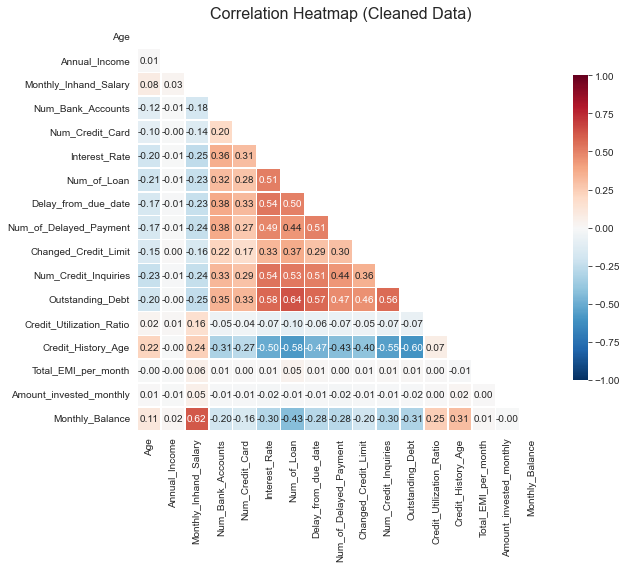

In [ ]:
#correlation heat map

corr_matrix = df[numeric_cols].corr()

#Generate  mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

#Customize figure
plt.figure(figsize=(10,8))
sns.set_style("white")

# 4. Draw the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .75}
)

plt.title("Correlation Heatmap (Cleaned Data)", fontsize=16)
plt.tight_layout()
plt.show()


Correlation Insights
* Monthly In-hand Salary and Monthly Balance: As expected -  strong positive correlation (0.62) between monthly in-hand salary and monthly balance. While this is below 0.7 threshold, we will pick only one from these when analyzing.
* Outstanding_Debt & Number_of Loans - we assume this is coming from people going into debt cycles . it also makes sense that credit history age and outstanding debt have negative correlation, as we expect that it takes time for debt to accumulate and become outstanding.
* Debt and Credit Inquiries: Number of Credit inquiries and Outstanding Debt are highly correlated.
* Loans, Delays and Inquiries: Number of Loans, Delay from due date and Number of credit inquiries are correlated.



Numeric Features vs Credit_Score

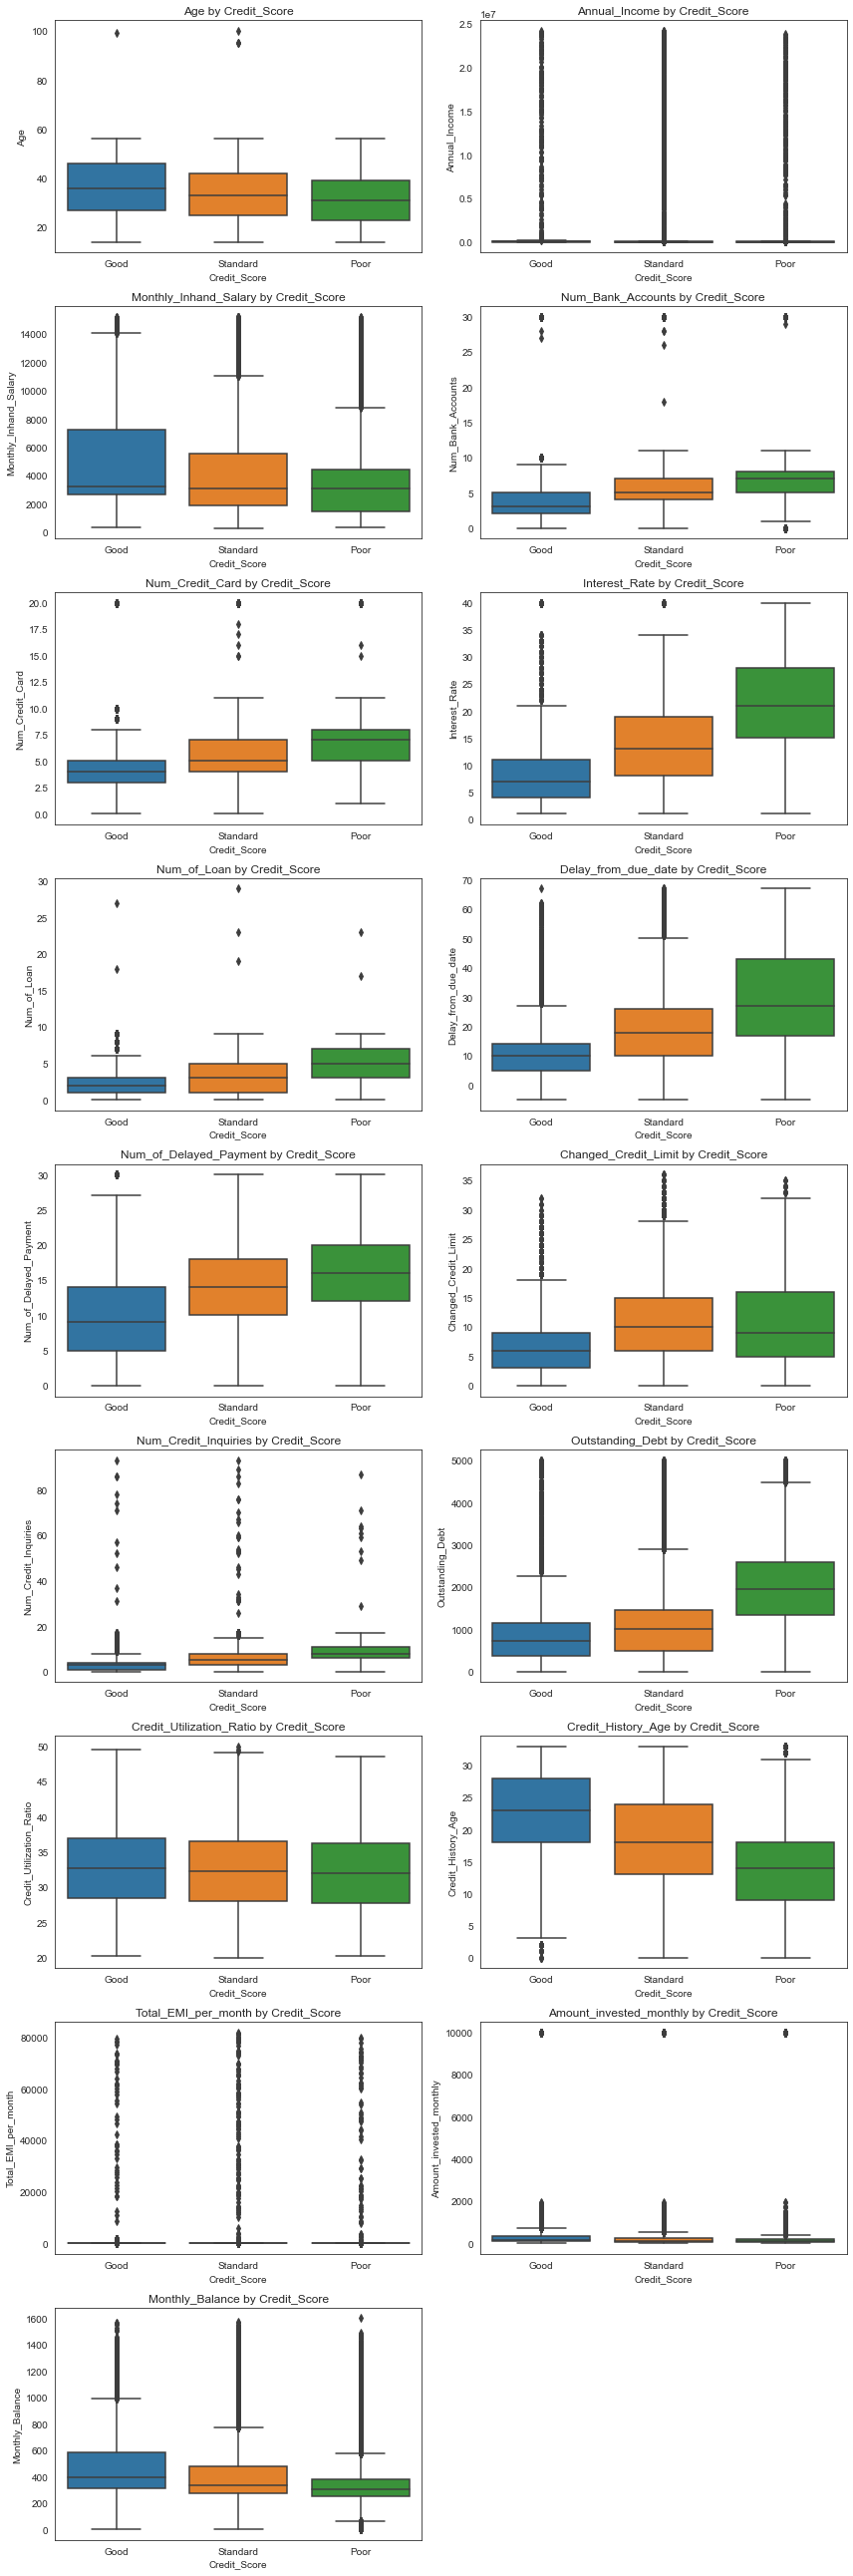

In [ ]:
numeric_cols = [
    "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts",
    "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date",
    "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries",
    "Outstanding_Debt", "Credit_Utilization_Ratio", "Credit_History_Age",
    "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"
]

num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols

plt.figure(figsize=(12, 4 * num_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x="Credit_Score", y=col, data=df)
    plt.title(f"{col} by Credit_Score")
    plt.tight_layout()

plt.show()

Insights from Numeric Features vs Credit Score
While outliers exist, some key insights

Monthly Inhand Salary: While median doesnt chagne much, IQR range increases with better performance.

Some patterns seen with decline in credit score:
- Decrease in Age median
- Interest rate seems to increase
- higher No. of Bank Accounts & Credit Card
-Higher Number of delayed payments, changed credit limits, number of credit inquires, outstanding debt.
- Lower Credit History Age

Credit Utilization Ratio is quite similarly distributed.


**Relationship between credit score & categorical variables**

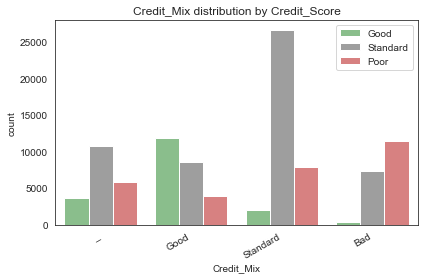

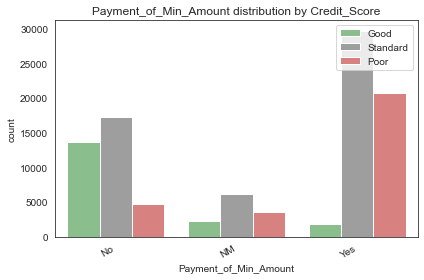

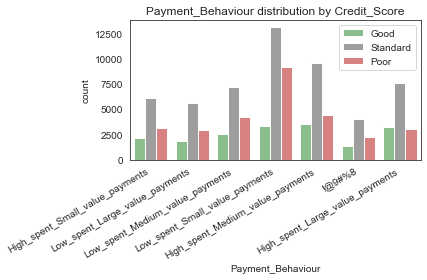

In [ ]:

categorical_cols = [
    "Credit_Mix",
    "Payment_of_Min_Amount",
    "Payment_Behaviour"
]

color_palette = {
    "Poor": "#E57373",  # Light red (salmon)
    "Standard": "#9E9E9E",  # Medium grey
    "Good": "#81C784"  # Light green (mint)
}

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="Credit_Score", data=df, palette=color_palette)  # Apply the palette
    plt.title(f"{col} distribution by Credit_Score")
    plt.xticks(rotation=30, ha='right', va='top')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

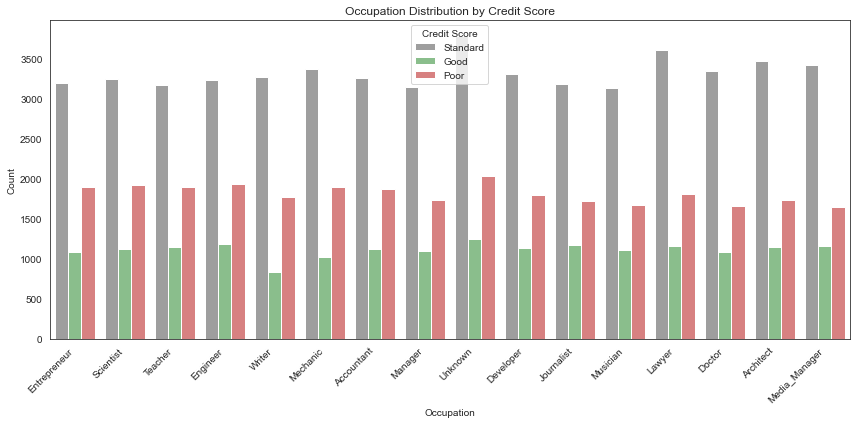

In [ ]:

#GIVEN WE ENCODED OCCUPATION, USE ORIGINAL ADATESET
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=train_data, palette=color_palette)


plt.title('Occupation Distribution by Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Credit Score')
plt.tight_layout()

plt.show()

**Insights from categorical variable split**

Credit Mix - as expected - we see a link here . we assume these to be dependent on one another.

Minimum Payments: "Good" scores show varied payment habits. "Standard" scores usually pay the minimum. "Poor" scores also lean towards minimum payments, but many don't pay.

Payment Behavior: Most people make mixed payments. "Standard" scores have higher counts in all categories. "Poor" scores are more common with high-value spending and unusual payment patterns.

Occupation: Most people have "Standard" credit, regardless of their job. The number of "Good" and "Poor" scores is fairly consistent across different jobs.